## Read Result


In [30]:
import pickle
import operator    
import re
import numpy as np
import matplotlib.pyplot as plt


In [31]:
MODEL = "COX"
PCA = False

REDUCED = '_P' if PCA else ''

TAIL = '_1105'


### Pancreatitis


In [32]:
with open(MODEL + '_results/' + MODEL + REDUCED + '_0' + TAIL + '.pickle', 'rb') as f:
    result = pickle.load(f)
    value = result[0]

PAN_concordance = list(result[1]["pancreatitis"])
PAN_IPEC = list(result[2]["pancreatitis"])

print(value)
print("Pancreatitis" + REDUCED + ":")
print("concordance:")
print(PAN_concordance)
print("best on concordance:")
print("coefficient:", value[np.argmax(PAN_concordance)], "| concordance:", np.max(PAN_concordance))
print("IPEC:")
print(PAN_IPEC)
print("best on IPEC:")
print("coefficient:", value[np.argmin(PAN_IPEC)], "| IPEC:", np.min(PAN_IPEC))


[0.0001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15]
Pancreatitis:
concordance:
[0.5276998556998557, 0.5316510341510342, 0.5477498797498798, 0.5545897065897066, 0.5555423280423281, 0.5516279461279461, 0.549075517075517, 0.5452077922077923, 0.5406606541606542, 0.5358412698412698, 0.5326269841269842, 0.5281195286195287, 0.5228496873496874, 0.522995670995671, 0.5230033670033669, 0.5196111111111111]
best on concordance:
coefficient: 0.04 | concordance: 0.5555423280423281
IPEC:
[0.3040015246374291, 0.2541398753701573, 0.2142592849812849, 0.19701662821144933, 0.1887321476850646, 0.18600684848077567, 0.18523310706393814, 0.18404937259616086, 0.18359791780923868, 0.18339976249001386, 0.18351727024892234, 0.18348128126971616, 0.1833442218525612, 0.18349847538612502, 0.18372674018601226, 0.1839864184540232]
best on IPEC:
coefficient: 0.12 | IPEC: 0.1833442218525612


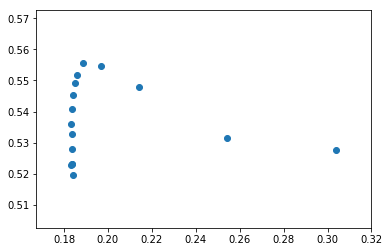

In [33]:
plt.scatter(PAN_IPEC, PAN_concordance)
# plt.savefig(MODEL + '_results/' + MODEL + REDUCED + '_0.png')


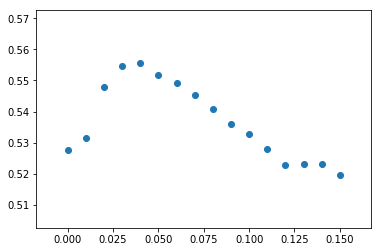

In [34]:
plt.scatter(value, PAN_concordance)


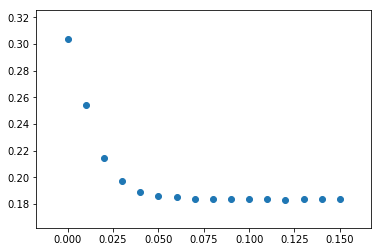

In [35]:
plt.scatter(value, PAN_IPEC)


### ICH

In [36]:
with open(MODEL + '_results/' + MODEL + REDUCED + '_1' + TAIL + '.pickle', 'rb') as f:
    result = pickle.load(f)
    value = result[0]

ICH_concordance = list(result[1]["ich"])
ICH_IPEC = list(result[2]["ich"])

print(value)
print("Ich" + REDUCED + ":")
print("concordance:")
print(ICH_concordance)
print("best on concordance:")
print("coefficient:", value[np.argmax(ICH_concordance)], "| concordance:", np.max(ICH_concordance))
print("IPEC:")
print(ICH_IPEC)
print("best on IPEC:")
print("coefficient:", value[np.argmin(ICH_IPEC)], "| IPEC:", np.min(ICH_IPEC))


[0.0001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15]
Ich:
concordance:
[0.4888459393516905, 0.5543016149645638, 0.5508836993145114, 0.5701108400139422, 0.5898411757871501, 0.6123203206692227, 0.6086408737074473, 0.6038302544440572, 0.6014898338561636, 0.6007869176251888, 0.6011042174973859, 0.6016744510282328, 0.6000119670036017, 0.5974226792145927, 0.5962982456140351, 0.5949683978157314]
best on concordance:
coefficient: 0.05 | concordance: 0.6123203206692227
IPEC:
[0.2740407883143113, 0.19986789787447035, 0.1771562727594492, 0.1728197781293436, 0.17222825473987402, 0.1728618052945683, 0.17335173335583148, 0.1743919302924057, 0.17564939143626004, 0.1766999540790932, 0.17776458477201446, 0.1790640926238246, 0.18059365172684974, 0.1815524355188531, 0.18221228828532698, 0.18287799147206402]
best on IPEC:
coefficient: 0.04 | IPEC: 0.17222825473987402


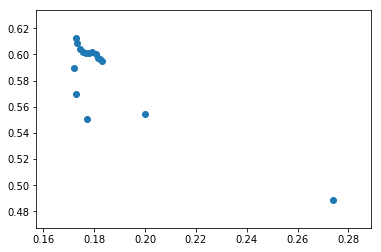

In [37]:
plt.scatter(ICH_IPEC, ICH_concordance)
# plt.savefig(MODEL + '_results/' + MODEL + REDUCED + '_1.png')


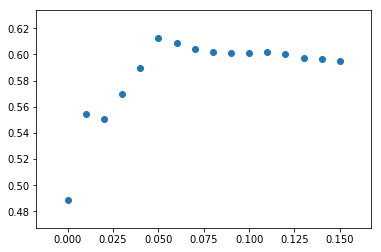

In [38]:
plt.scatter(value, ICH_concordance)


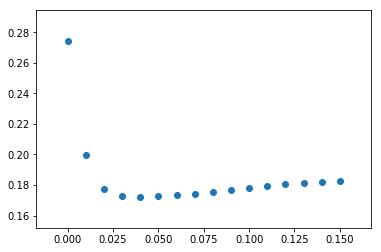

In [39]:
plt.scatter(value, ICH_IPEC)


### Sepsis


In [146]:
with open(MODEL + '_results/' + MODEL + REDUCED + '_2' + TAIL + '.pickle', 'rb') as f:
    result = pickle.load(f)
    value = result[0]
SEP_concordance = list(result[1]["sepsis"])
SEP_IPEC = list(result[2]["sepsis"])
print(value)
print("Sepsis" + REDUCED + ":")
print("concordance:")
print(SEP_concordance)
print("best on concordance:")
print("coefficient:", value[np.argmax(SEP_concordance)], "| concordance:", np.max(SEP_concordance))
print("IPEC:")
print(SEP_IPEC)
print("best on IPEC:")
print("coefficient:", value[np.argmin(SEP_IPEC)], "| IPEC:", np.min(SEP_IPEC))


[3, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200]
Sepsis:
concordance:
[0.5421887220877557, 0.5467849845516104, 0.5556321602296361, 0.5635971574376404, 0.5667868383134806, 0.5681848303406645, 0.571169874995879, 0.5734190204207059, 0.574374026496032, 0.5748546114214104, 0.5752073634364124, 0.5753912131842766, 0.5754770484841434, 0.5756959343620244, 0.5759031895832624, 0.5755812999332186, 0.5753123998671835]
best on concordance:
coefficient: 160 | concordance: 0.5759031895832624
IPEC:
[0.22781833343909721, 0.21113550193027159, 0.19767862245471152, 0.18952913063240215, 0.1863809655674069, 0.18507739302921125, 0.18410081892824526, 0.18370605133174686, 0.18356561611957056, 0.1834996929248687, 0.18331567937003956, 0.183442837448897, 0.18359889698388446, 0.18359572793005616, 0.18356461779056052, 0.18358939833376592, 0.1836253095597395]
best on IPEC:
coefficient: 90 | IPEC: 0.18331567937003956


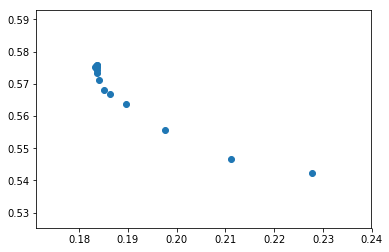

In [147]:
plt.scatter(SEP_IPEC, SEP_concordance)
# plt.savefig(MODEL + '_results/' + MODEL + REDUCED + '_2.png')


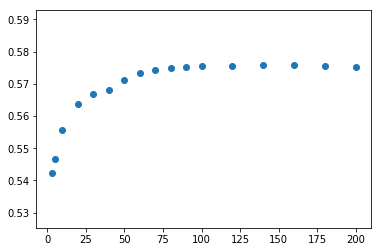

In [148]:
plt.scatter(value, SEP_concordance)


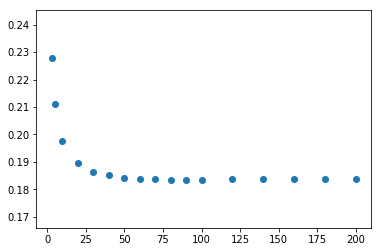

In [149]:
plt.scatter(value, SEP_IPEC)


###  RSF

#### reduced


In [131]:
n_components = 25
RSF_reduced_n_trees = [50]

with open('RSF_results/RSF_P_01.pickle', 'rb') as f:
    result = pickle.load(f)
    RSF_reduced_max_features = result[0]
    RSF_reduced_max_depths = result[1]
    RSF_reduced_result = result[2:]


In [135]:
RSF_reduced_dict = {}
for n_tree in RSF_reduced_n_trees:
    for row, max_feature in enumerate(RSF_reduced_max_features):
        for col, max_depth in enumerate(RSF_reduced_max_depths):
            RSF_reduced_dict[(n_tree, max_feature, max_depth)] = {
                "conc_PAN": RSF_reduced_result[0]["pancreatitis"][row][col],
                "conc_ICH": RSF_reduced_result[0]["ich"][row][col],
                "ipec_PAN": RSF_reduced_result[1]["pancreatitis"][row][col],
                "ipec_ICH": RSF_reduced_result[1]["ich"][row][col]                
            }
                
RSF_reduced_PAN_concordance_best = max(RSF_reduced_dict.items(), key=lambda x:x[1]["conc_PAN"])
RSF_reduced_ICH_concordance_best = max(RSF_reduced_dict.items(), key=lambda x:x[1]["conc_ICH"])
RSF_reduced_PAN_IPEC_best = min(RSF_reduced_dict.items(), key=lambda x:x[1]["ipec_PAN"])
RSF_reduced_ICH_IPEC_best = min(RSF_reduced_dict.items(), key=lambda x:x[1]["ipec_ICH"])

print("RSF reduced - PAN:")
print("best on concordance:")
print("n_tree, max_feature, max_depth:", RSF_reduced_PAN_concordance_best[0], "| concordance:", RSF_reduced_PAN_concordance_best[1]["conc_PAN"])
print("best on IPEC:")
print("n_tree, max_feature, max_depth:", RSF_reduced_PAN_IPEC_best[0], "| IPEC:", RSF_reduced_PAN_IPEC_best[1]["ipec_PAN"])
print()
print("RSF reduced - ICH:")
print("best on concordance:")
print("n_tree, max_feature, max_depth:", RSF_reduced_ICH_concordance_best[0], "| concordance:", RSF_reduced_ICH_concordance_best[1]["conc_ICH"])
print("best on IPEC:")
print("n_tree, max_feature, max_depth:", RSF_reduced_ICH_IPEC_best[0], "| IPEC:", RSF_reduced_ICH_IPEC_best[1]["ipec_ICH"])


RSF reduced - PAN:
best on concordance:
n_tree, max_feature, max_depth: (50, 20, 3) | concordance: 0.5730704665704667
best on IPEC:
n_tree, max_feature, max_depth: (50, 20, 3) | IPEC: 1.9541753518974598

RSF reduced - ICH:
best on concordance:
n_tree, max_feature, max_depth: (50, 40, 6) | concordance: 0.5952223771348901
best on IPEC:
n_tree, max_feature, max_depth: (50, 80, 6) | IPEC: 1.7582790761672764


#### without reduction


In [95]:
RSF_n_trees = [20, 50]
RSF_max_features = [10, 20, 40, 60, 80, 200]
RSF_max_depths = [5, 10, 15]
RSF_dict = {}

with open('RSF_results/RSF.out', 'r') as f:
    dataset = 'PAN'
    n_tree = 20
    max_feature = 10
    max_depth = 5
    for line in f:
        if re.match(r'For the ich dataset:', line):
            dataset = 'ICH'
            continue
        if re.match(r'\[LOG\] n_tree', line):
            tokens = line.split(" = ")
            n_tree = int(tokens[1].split(",")[0])
            max_feature = int(tokens[2].split(",")[0])
            max_depth = int(tokens[3].split("\n")[0])
            if (n_tree, max_feature, max_depth) not in RSF_dict:
                RSF_dict[(n_tree, max_feature, max_depth)] = {}
        if re.match(r'\[LOG\] avg\. concordance', line):
            concordance = float(line.split(": ")[1])
            RSF_dict[(n_tree, max_feature, max_depth)]["conc_" + dataset] = concordance
        if re.match(r'\[LOG\] avg\. ipec', line):
            ipec_score = float(line.split(": ")[1])
            RSF_dict[(n_tree, max_feature, max_depth)]["ipec_" + dataset] = ipec_score
 

In [96]:
RSF_PAN_concordance_best = max(RSF_dict.items(), key=lambda x:x[1]["conc_PAN"])
RSF_ICH_concordance_best = max(RSF_dict.items(), key=lambda x:x[1]["conc_ICH"])
RSF_PAN_IPEC_best = min(RSF_dict.items(), key=lambda x:x[1]["ipec_PAN"])
RSF_ICH_IPEC_best = min(RSF_dict.items(), key=lambda x:x[1]["ipec_ICH"])

print("RSF reduced - PAN:")
print("best on concordance:")
print("n_tree, max_feature, max_depth:", RSF_PAN_concordance_best[0], "| concordance:", RSF_PAN_concordance_best[1]["conc_PAN"])
print("best on IPEC:")
print("n_tree, max_feature, max_depth:", RSF_PAN_IPEC_best[0], "| IPEC:", RSF_PAN_IPEC_best[1]["ipec_PAN"])
print()
print("RSF reduced - ICH:")
print("best on concordance:")
print("n_tree, max_feature, max_depth:", RSF_ICH_concordance_best[0], "| concordance:", RSF_ICH_concordance_best[1]["conc_ICH"])
print("best on IPEC:")
print("n_tree, max_feature, max_depth:", RSF_ICH_IPEC_best[0], "| IPEC:", RSF_ICH_IPEC_best[1]["ipec_ICH"])


RSF reduced - PAN:
best on concordance:
n_tree, max_feature, max_depth: (50, 20, 10) | concordance: 0.559587542087542
best on IPEC:
n_tree, max_feature, max_depth: (50, 40, 5) | IPEC: 0.18194392586255279

RSF reduced - ICH:
best on concordance:
n_tree, max_feature, max_depth: (20, 10, 5) | concordance: 0.586682119205298
best on IPEC:
n_tree, max_feature, max_depth: (20, 80, 5) | IPEC: 0.18125757444497248
